In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image
import h5py

In [2]:
file = h5py.File("face_dataset.h5","r+")
X_train = np.array(file["/training_set"]).astype("uint8")
X_test = np.array(file["/testing_set"]).astype("uint8")

In [3]:
print("Shape of training set: {}".format(X_train.shape))
print("Shape of testing set: {}".format(X_test.shape))

Shape of training set: (48, 10304)
Shape of testing set: (12, 10304)


In [106]:
def image_grid(D,H,W,cols=10,scale=1):
    """ display a grid of images
        H,W: Height and width of the images
        cols: number of columns = number of images in each row
        scale: 1 to fill screen
    """
    n = np.shape(D)[0]
    rows = int(math.ceil((n+0.0)/cols))
    fig = plt.figure(1,figsize=[scale*20.0/H*W,scale*20.0/cols*rows],dpi=300)
    for i in range(n):
        plt.subplot(rows,cols,i+1)
        fig=plt.imshow(np.reshape(D[i,:],[H,W]), cmap = plt.get_cmap("gray"))
        plt.axis('off')

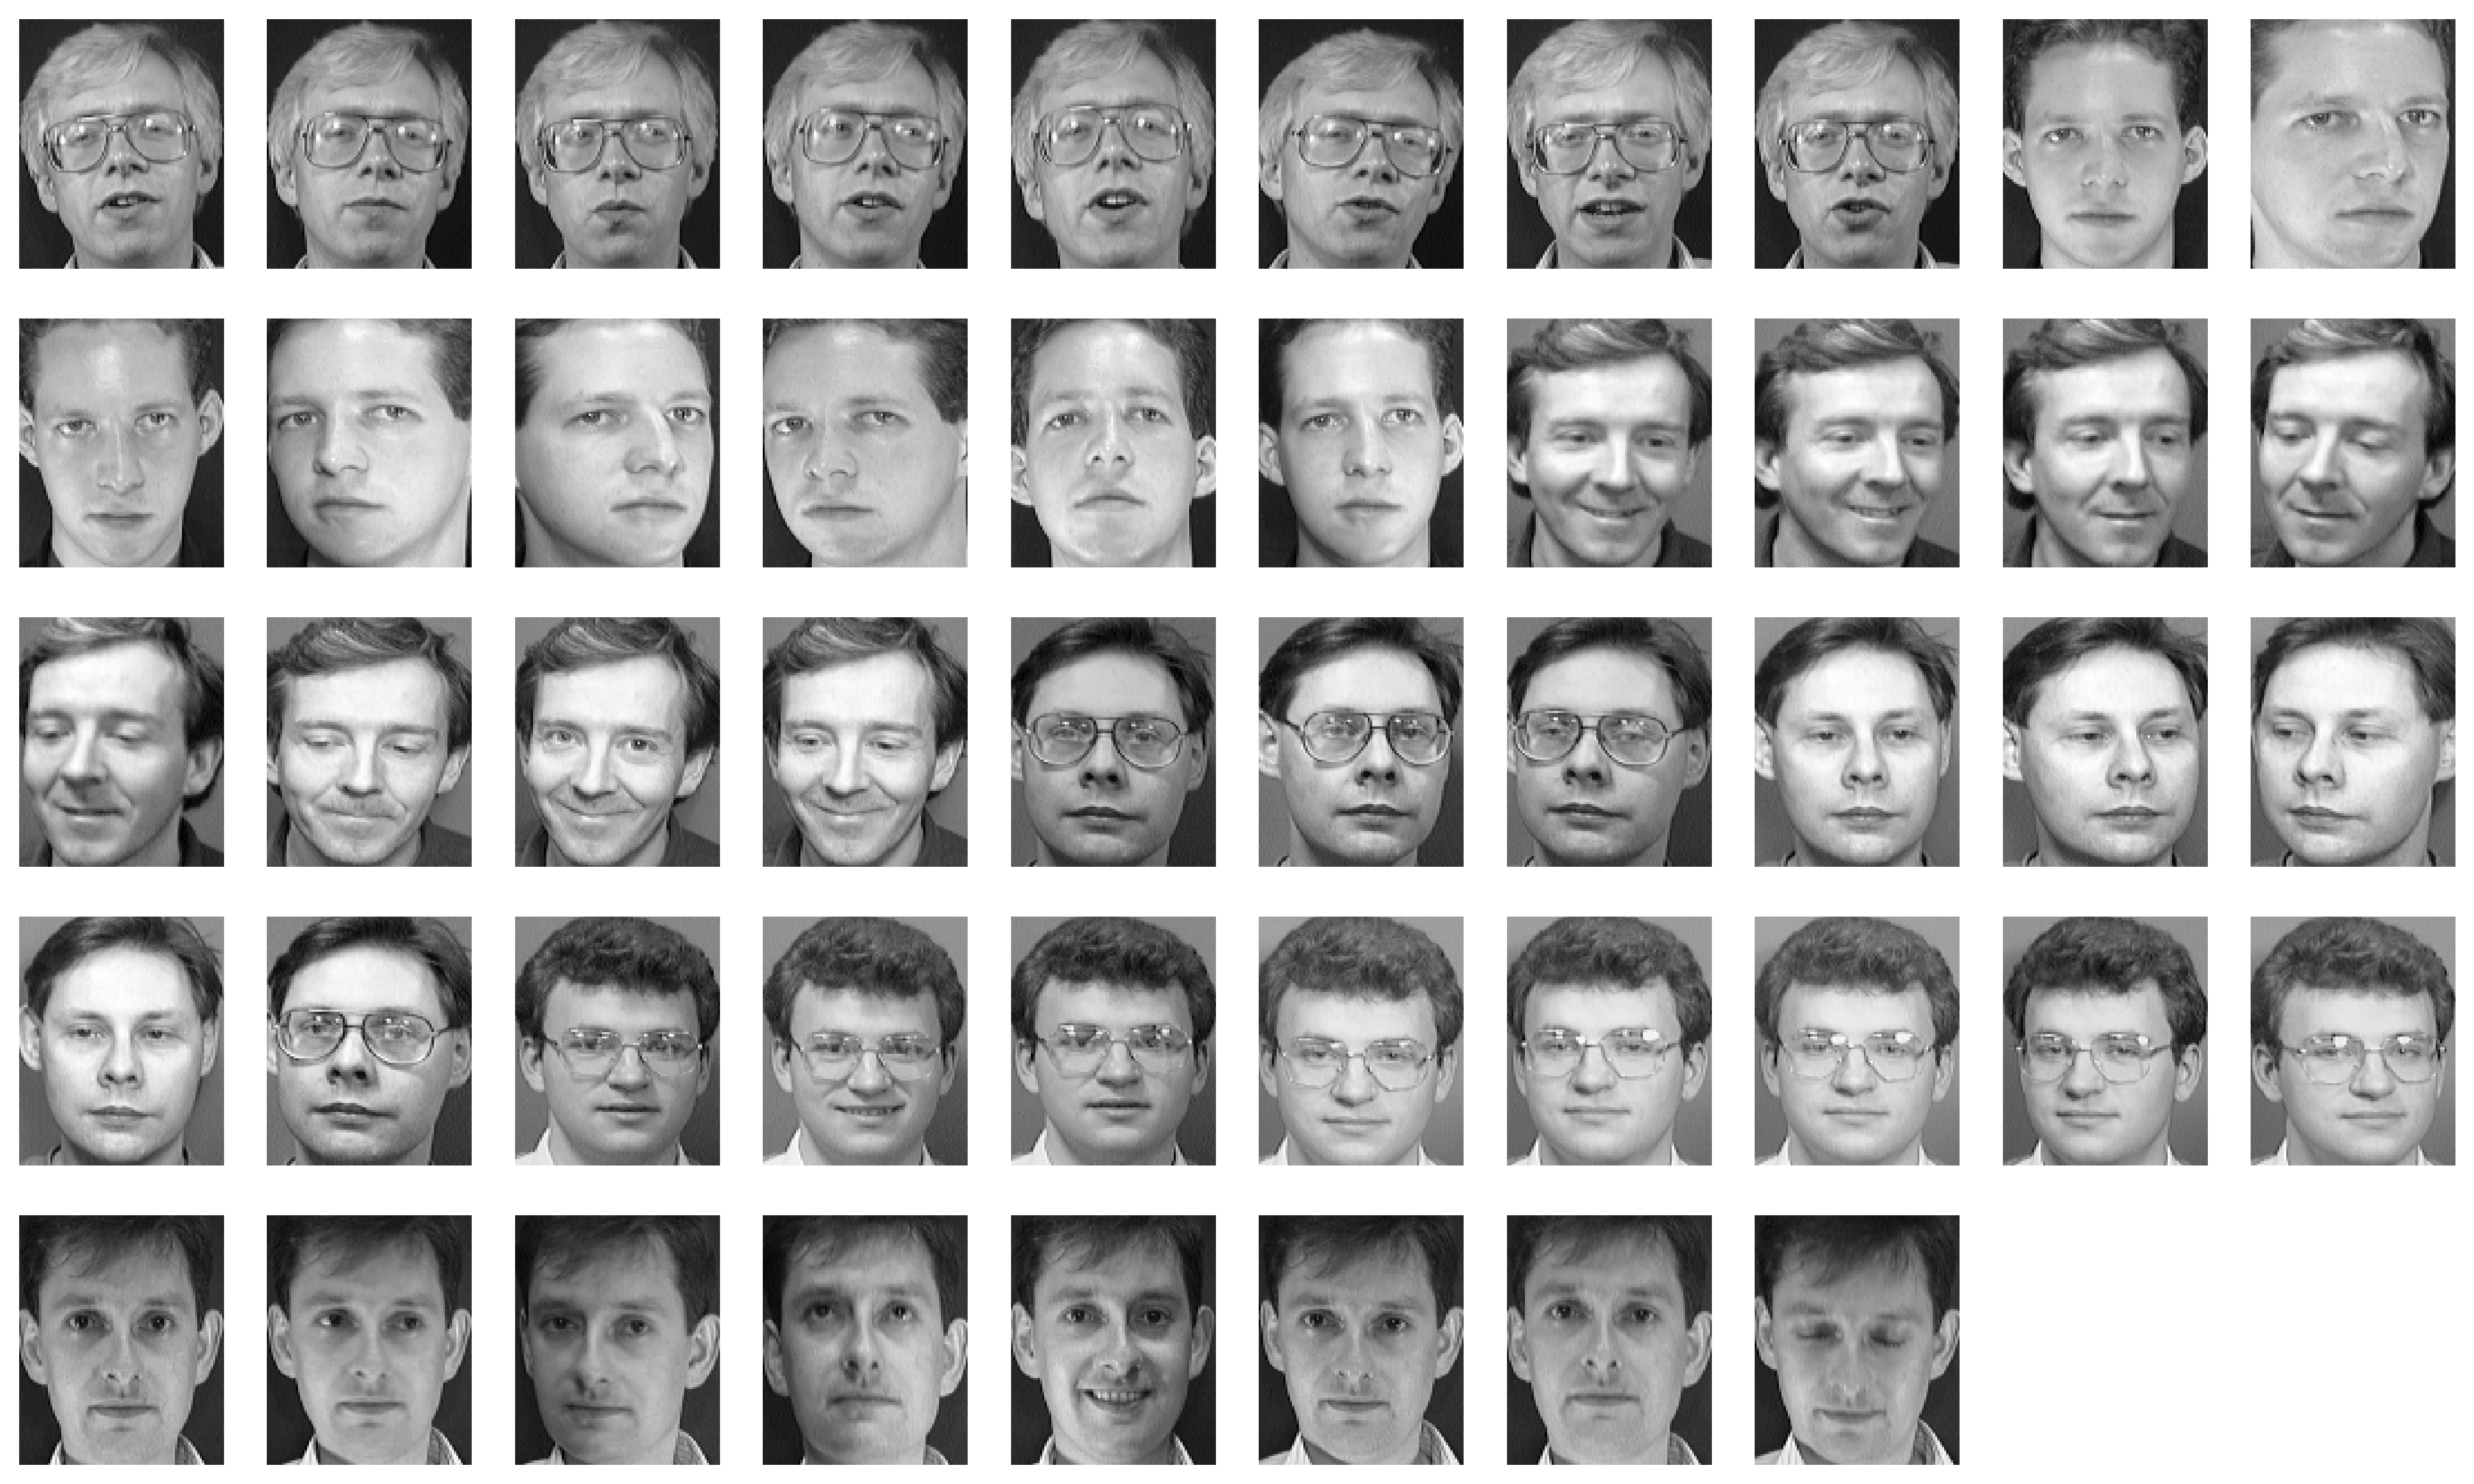

In [107]:
H=112
W=92
# show the training images
image_grid(X_train,H,W)
# plt.show()

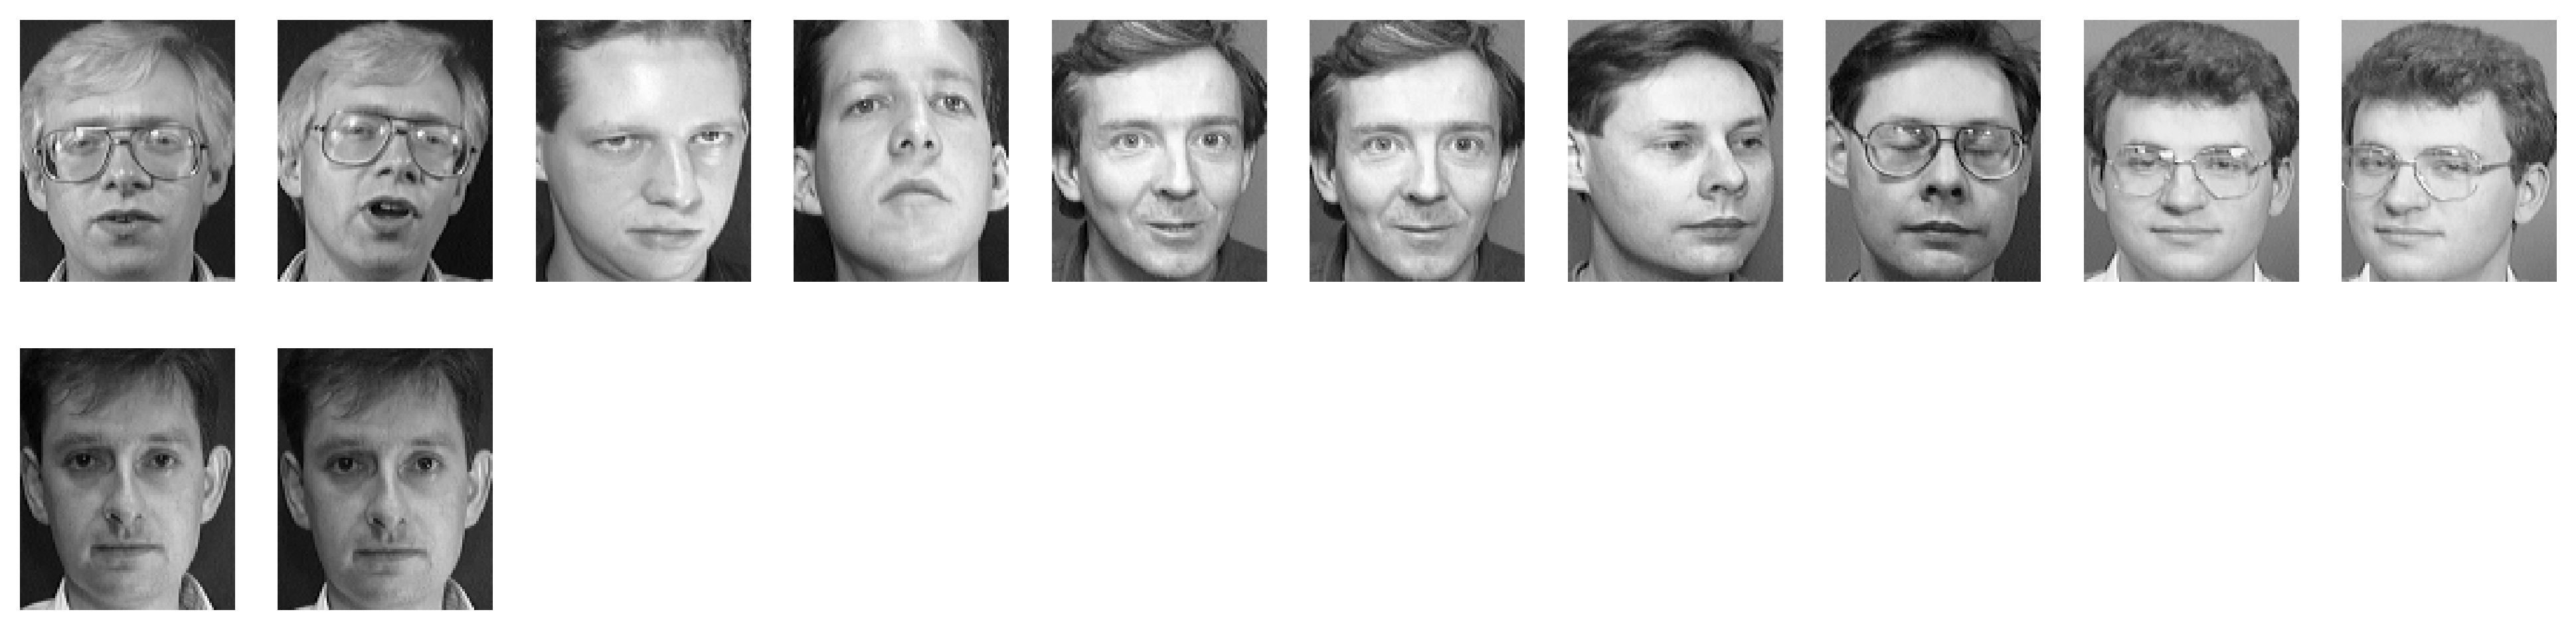

In [10]:
# Show testing images
image_grid(X_test,H,W)
plt.show()

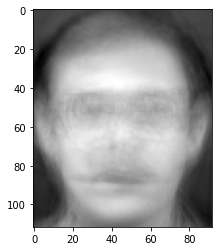

In [23]:
# Find the mean image
mean_image = np.mean(X_train,axis=0)
plt.imshow(np.reshape(mean_image,[H,W]),cmap = plt.get_cmap("gray"))
plt.show()

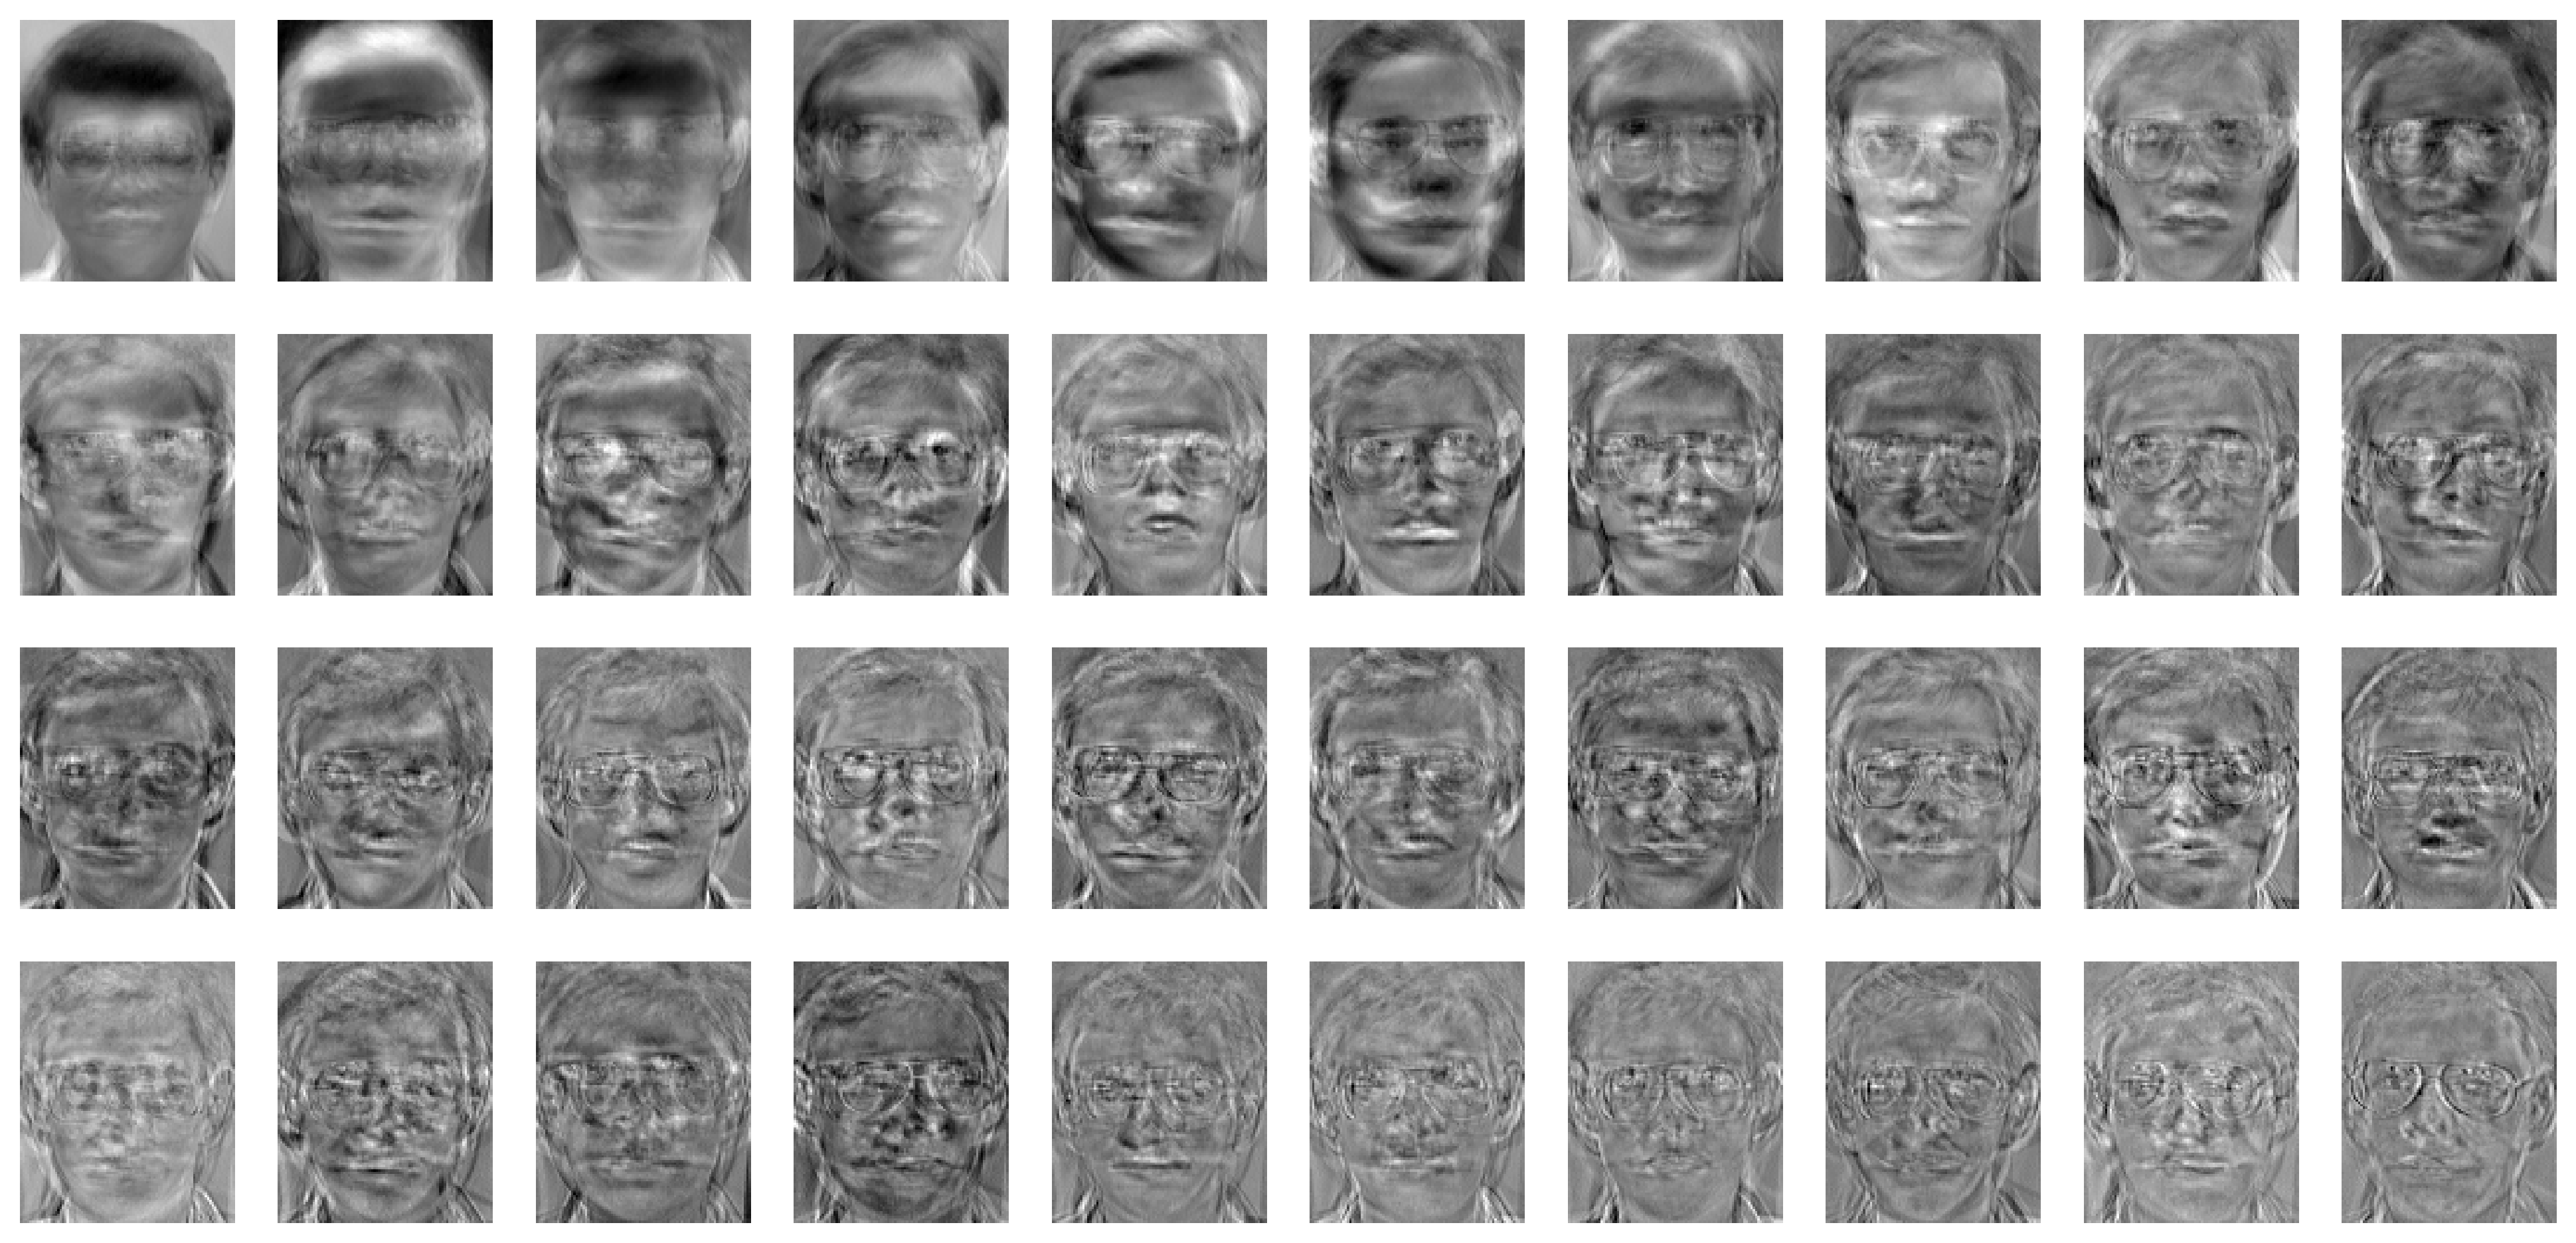

In [155]:
from sklearn.decomposition import PCA
n_components = 40
# dimension reduction
#Extract the top 40 eigenfaces from the dataset
pca = PCA(n_components=n_components,svd_solver="randomized").fit(X_train)

#Show the eigenfaces
eigenfaces = pca.components_
image_grid(eigenfaces[:,:],H,W)
plt.show()

eigenfaces = eigenfaces.reshape(n_components,H,W)

once PCA done transformation/predict

(-0.5, 3.5, 9.5, -0.5)

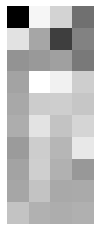

In [160]:
# Project the input data on the eigenfaces orthornormal basis
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
plt.subplot(1,1,1)
fig=plt.imshow(np.reshape(X_train_pca[0,:],[10,4]), cmap = plt.get_cmap("gray"))
plt.axis('off')

In [148]:
print(X_train_pca[3].shape)
X_train_lda[0].shape

(40,)


(5,)

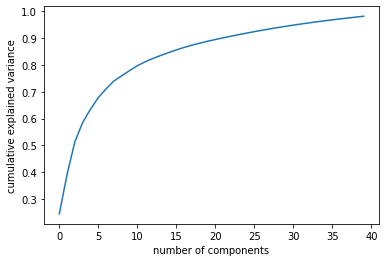

In [28]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [23]:
# Calculate distances

intra_class_dist = np.sum(np.power((X_train_pca[1,:] - X_test_pca[1,:]),2))
inter_class_dist = np.sum(np.power((X_train_pca[1,:] - X_test_pca[6,:]),2))
print("Intra-class distance: %d" % (intra_class_dist))
print("Inter-class distance: %d" % (inter_class_dist))


Intra-class distance: 3386669
Inter-class distance: 20583556


LDA

give y_train and each classes inside y_train means what the data belongs to which class

in the end, all the dimension will be reduced based on the classes inside the y_train

In [122]:
X_train = np.array(file["/training_set"]).astype("uint8")
y_train = np.array([1,1,1,1,1,1,1,1,
                    2,2,2,2,2,2,2,2,
                    3,3,3,3,3,3,3,3,
                    4,4,4,4,4,4,4,4,
                    5,5,5,5,5,5,5,5,
                    6,6,6,6,6,6,6,6])
X_test = np.array(file["/testing_set"]).astype("uint8")

print("Shape of training set: {}".format(X_train.shape))
print("Shape of testing set: {}".format(X_test.shape))
print("Shape of training label: {}".format(y_train.shape))

Shape of training set: (48, 10304)
Shape of testing set: (12, 10304)
Shape of training label: (48,)


In [133]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
lda = LinearDiscriminantAnalysis(n_components=5)

clf = lda.fit(X_train, y_train)
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)
print(clf.predict([X_train[20,:]]))

[3]


(-0.5, 4.5, 47.5, -0.5)

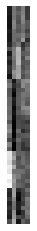

In [124]:
plt.subplot(1,1,1)
fig=plt.imshow(X_train_lda, cmap = plt.get_cmap("gray"))
plt.axis('off')

In [120]:
print("Shape of training set: {}".format(X_train_lda.shape))
print("Shape of testing set: {}".format(X_test_lda.shape))

Shape of training set: (48, 5)
Shape of testing set: (12, 5)


In [41]:
# Calculate distances
intra_class_dist = np.sum(np.power((X_train_lda[1,:] - X_test_lda[1,:]),2))
inter_class_dist = np.sum(np.power((X_train_lda[1,:] - X_test_lda[6,:]),2))
print("Intra-class distance: %d" % (intra_class_dist))
print("Inter-class distance: %d" % (inter_class_dist))


Intra-class distance: 3
Inter-class distance: 72


In [127]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)
print(clf.predict([[-0.8, -1],[1,2],[-1,-2],[-1000,-200]]))

[1 2 1 1]
